# LFC Data Analysis: The LFC Goal Machine (R version)

This is the R version of The LFC Goal machine. For a full description of the project see the [lfcgm github repository](https://github.com/terrydolan/lfcgm). Note that the R version files are in the *Rversion* folder.

The notebook describes how the app was converted to run as an RShiny app.

The project uses [Jupyter Notebook](http://jupyter.org/), [R](https://www.r-project.org/), [R ggplot](http://ggplot2.org/), [R studio](https://www.rstudio.com/), [R shiny](http://shiny.rstudio.com/), [R dplyr](https://cran.r-project.org/web/packages/dplyr/index.html).

#### Notebook Change Log

Last updated: 31st October 2016

Version: 2.1.0

Change Description: Add data files for season 2015-16 and check

## Summary

The initial aim was simply to convert the web app that was developed using python, spyre and ggplot to an equivalent version using R, shiny and ggplot.

This was very straight-forward with Rshiny offering a richer UI than python spyre. The R files for the equivalent version are in the lfcgmRv1 folder. Note that R's ggplot handles a player with 2 datapoints differently from python's ggplot. THerefore a tweak was required to the R ggplot function to cope with players with only 2 data points. 

The Rversion folder contains the latest R version with an enhanced (simplified) user interface. This takes advantage of Rshiny's *selectizeInput* with multiple inputs.

## Set-up

Import the R libraries needed for the analysis.

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Load the LFC data into R dataframes and munge

#### Create dataframe of players, combining scorers in top league level season with squad position and age

In [2]:
dflfcgm <- read.csv('data/lfc_scorers_tl_pos_age.csv', header=TRUE)

In [4]:
# check demension of dataframe, expect 1198 rows
dim(dflfcgm)

[1] 1198    6

In [6]:
# check head includes latest season: 2015-16, top scorer is Roberto Firmino
head(dflfcgm)

,X,season,player,league,position,age
1,0,2015-2016,Roberto Firmino,10,Striker,24.3
2,1,2015-2016,Christian Benteke,9,Striker,25.1
3,2,2015-2016,Daniel Sturridge,8,Striker,26.4
4,3,2015-2016,Philippe Coutinho,8,Midfielder,23.6
5,4,2015-2016,Divock Origi,5,Striker,20.7
6,5,2015-2016,James Milner,5,Midfielder,30


In [7]:
# check column names
colnames(dflfcgm)

[1] "X"        "season"   "player"   "league"   "position" "age"

In [8]:
# drop column X (the original row index from the file)
drops <- c('X')
dflfcgm <- dflfcgm[ , !(names(dflfcgm) %in% drops)]

In [9]:
# check dimensions, should be 5 columns
dim(dflfcgm)

[1] 1198    5

In [10]:
head(dflfcgm)

,season,player,league,position,age
1,2015-2016,Roberto Firmino,10,Striker,24.3
2,2015-2016,Christian Benteke,9,Striker,25.1
3,2015-2016,Daniel Sturridge,8,Striker,26.4
4,2015-2016,Philippe Coutinho,8,Midfielder,23.6
5,2015-2016,Divock Origi,5,Striker,20.7
6,2015-2016,James Milner,5,Midfielder,30


In [12]:
# check tail, should show 1894-95
tail(dflfcgm)

,season,player,league,position,age
1193,1894-1895,Malcolm McVean,5,Striker,23.8
1194,1894-1895,Frank Becton,4,Striker,21.2
1195,1894-1895,Neil Kerr,3,Midfielder,23.7
1196,1894-1895,Hugh McQueen,2,Midfielder,27.3
1197,1894-1895,Joe McQue,1,Defender,21.8
1198,1894-1895,Patrick Gordon,1,Midfielder,24.9


In [13]:
summary(dflfcgm)
str(dflfcgm)

       season                player         league                 position  
 1911-1912:  17   Steven Gerrard:  16   Min.   : 1.000   Centre-forward:  1  
 2015-2016:  17   Ian Rush      :  14   1st Qu.: 1.000   Defender      :300  
 1897-1898:  16   Ian Callaghan :  13   Median : 3.000   Half-back     :  2  
 1903-1904:  16   Ronnie Whelan :  13   Mean   : 5.413   Left-winger   :  7  
 1991-1992:  16   Tommy Smith   :  12   3rd Qu.: 7.000   Midfielder    :438  
 2008-2009:  16   Arthur Goddard:  11   Max.   :36.000   Right-winger  :  5  
 (Other)  :1100   (Other)       :1119                    Striker       :445  
      age       
 Min.   :17.10  
 1st Qu.:23.43  
 Median :25.90  
 Mean   :26.16  
 3rd Qu.:28.60  
 Max.   :36.00  
                

'data.frame':	1198 obs. of  5 variables:
 $ season  : Factor w/ 101 levels "1894-1895","1896-1897",..: 101 101 101 101 101 101 101 101 101 101 ...
 $ player  : Factor w/ 380 levels "Abel Xavier",..: 313 72 82 301 104 177 3 200 83 230 ...
 $ league  : int  10 9 8 8 5 5 4 2 2 2 ...
 $ position: Factor w/ 7 levels "Centre-forward",..: 7 7 7 5 7 5 5 5 7 5 ...
 $ age     : num  24.3 25.1 26.4 23.6 20.7 30 27.7 25.8 23.5 25.6 ...


#### Create dataframe the dropdown list of players for app

In [14]:
dflfcgm_dd <- read.csv('data/lfcgm_app_dropdown.csv', header=TRUE)

In [16]:
# check dimensions, expect 237 rows
dim(dflfcgm_dd)

[1] 237   2

In [18]:
# check head, expect Adam Lallana at top (added in 2015-16)
head(dflfcgm_dd)

,label,value
1,Adam Lallana,Adam Lallana
2,Alan A'Court,Alan A'Court
3,Alan Hansen,Alan Hansen
4,Alan Kennedy,Alan Kennedy
5,Albert Stubbins,Albert Stubbins
6,Alberto Moreno,Alberto Moreno


## Analyse the data

Ask a question and find the answer!

#### Create an R  function to plot player's age vs top level league goals

This function will be at the heart of server.UI.

,season,player,league,position,age
18,2014-2015,Steven Gerrard,9,Midfielder,34.6
33,2013-2014,Luis Suarez,31,Striker,27
35,2013-2014,Steven Gerrard,13,Midfielder,33.6
45,2012-2013,Luis Suarez,23,Striker,26
47,2012-2013,Steven Gerrard,9,Midfielder,32.6
60,2011-2012,Luis Suarez,11,Striker,25


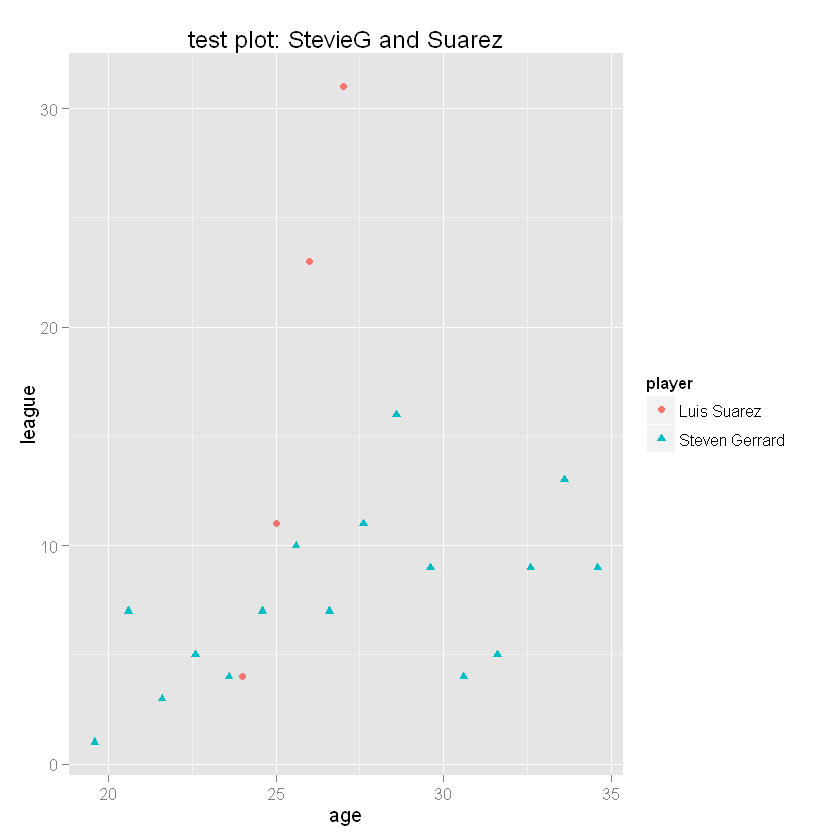

In [19]:
# start with a basic ggplot plot

# create a filter of the dataframe and produce a plot of the data points
df <- dflfcgm[dflfcgm$player %in% c('Luis Suarez', 'Steven Gerrard'),]
head(df)
ggplot(df, aes(x=age, y=league, color=player, shape=player)) + geom_point()  + ggtitle('test plot: StevieG and Suarez')

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.
Warning message:
In simpleLoess(y, x, w, span, degree, parametric, drop.square, normalize, : span too small.   fewer data values than degrees of freedom.Warning message:
In simpleLoess(y, x, w, span, degree, parametric, drop.square, normalize, : pseudoinverse used at 23.985Warning message:
In simpleLoess(y, x, w, span, degree, parametric, drop.square, normalize, : neighborhood radius 2.015Warning message:
In simpleLoess(y, x, w, span, degree, parametric, drop.square, normalize, : reciprocal condition number  0Warning message:
In simpleLoess(y, x, w, span, degree, parametric, drop.square, normalize, : There are other near singularities as well. 4.0602

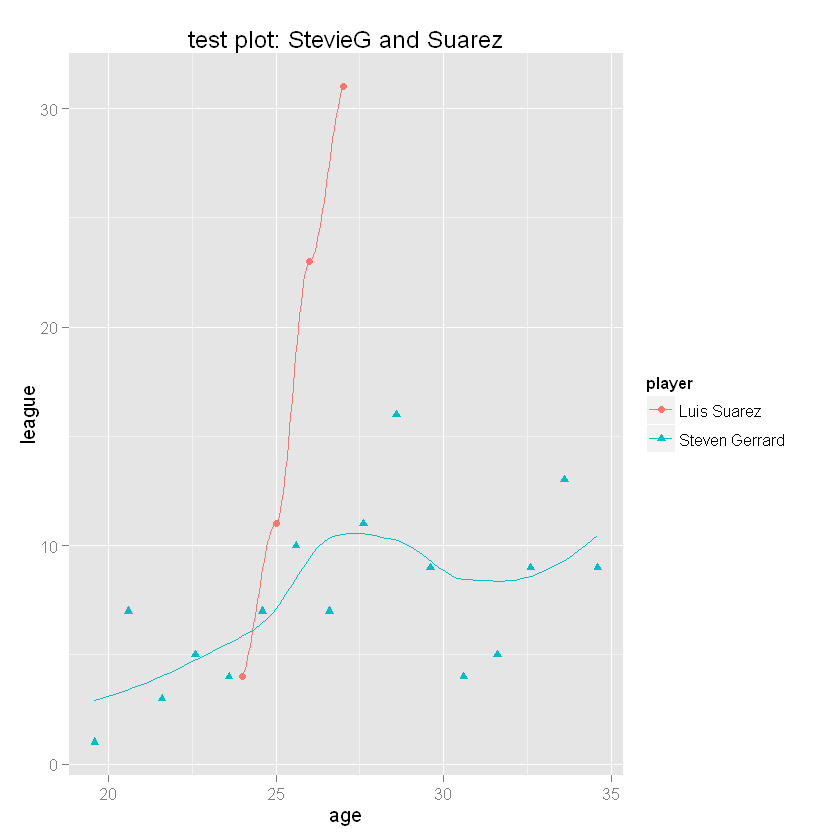

In [20]:
# add the line of best fit

# create a filter of the dataframe and produce a plot of the data points
df <- dflfcgm[dflfcgm$player %in% c('Luis Suarez', 'Steven Gerrard'),]
ggplot(df, aes(x=age, y=league, color=player, shape=player)) + 
            geom_point() +
            geom_smooth(se=FALSE) + 
            ggtitle('test plot: StevieG and Suarez')

In [21]:
ggplot_age_vs_lgoals <- function(df, players) {
  # Return ggplot of Age vs League Goals for given players in dataframe.
  #
  #  Given the low number of points, ggplot's geom_smooth uses
  #  the loess method with default span.
  TITLE <- 'LFCGM Age vs League Goals'
  XLABEL <- 'Age at Midpoint of Season'
  YLABEL <- 'League Goals per Season'
  EXEMPLAR_PLAYERS <- c('Ian Rush', 'Kenny Dalglish', 'Roger Hunt', 'David Johnson', 
                        'Harry Chambers', 'John Toshack', 'John Barnes', 'Kevin Keegan')
  EXEMPLAR_TITLE <- 'LFCGM Example Plot, The Champions: Age vs League Goals'
  
  # if players vector is empty then set the default exemplar options
  if (length(players) == 0) {
    players <- EXEMPLAR_PLAYERS
    TITLE <- EXEMPLAR_TITLE
  } else {
    title <- TITLE
  }
  
  # create dataframes to plot...
  # filter those players with only 2 points and those with more than 2
  this_df <- df[df$player %in% players, ]
  this_dfeq2 <- this_df %>% group_by(player) %>% filter(n()==2)
  this_dfgt2 <- this_df %>% group_by(player) %>% filter(n()>2) 

  # produce the plot and return it
  this_plot <- ggplot(this_df, aes(x=age, y=league, color=player, shape=player)) + 
    geom_point(size=2) + 
    geom_line(data=this_dfeq2, size=0.1) +
    geom_smooth(data=this_dfgt2, se=FALSE, size=0.1) + 
    xlab(XLABEL) + 
    ylab(YLABEL) + 
    ggtitle(TITLE) + 
    scale_shape_manual(values=0:length(players)) +
    theme(legend.text=element_text(size=10))
  return (this_plot)
}

#### Show first few plots from original lfcgm data analysis
Ref: http://www.lfcsorted.com/2016/03/the-lfc-goal-machine-graphic-detail.html

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


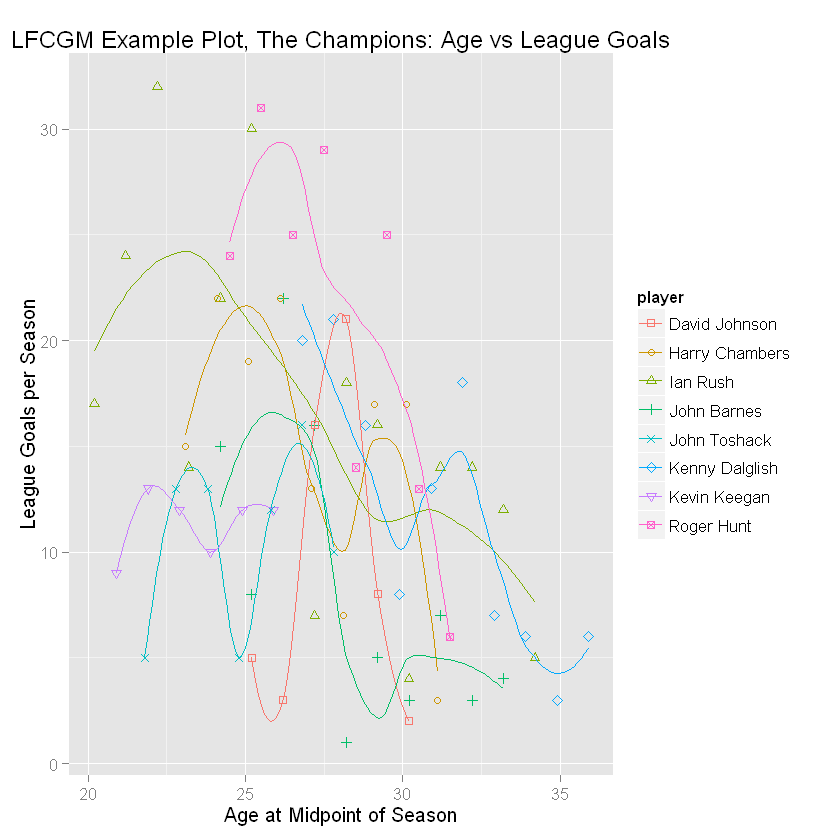

In [23]:
# show default plot
players = c()
plt <- ggplot_age_vs_lgoals(dflfcgm, players)
suppressWarnings(print(plt))

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


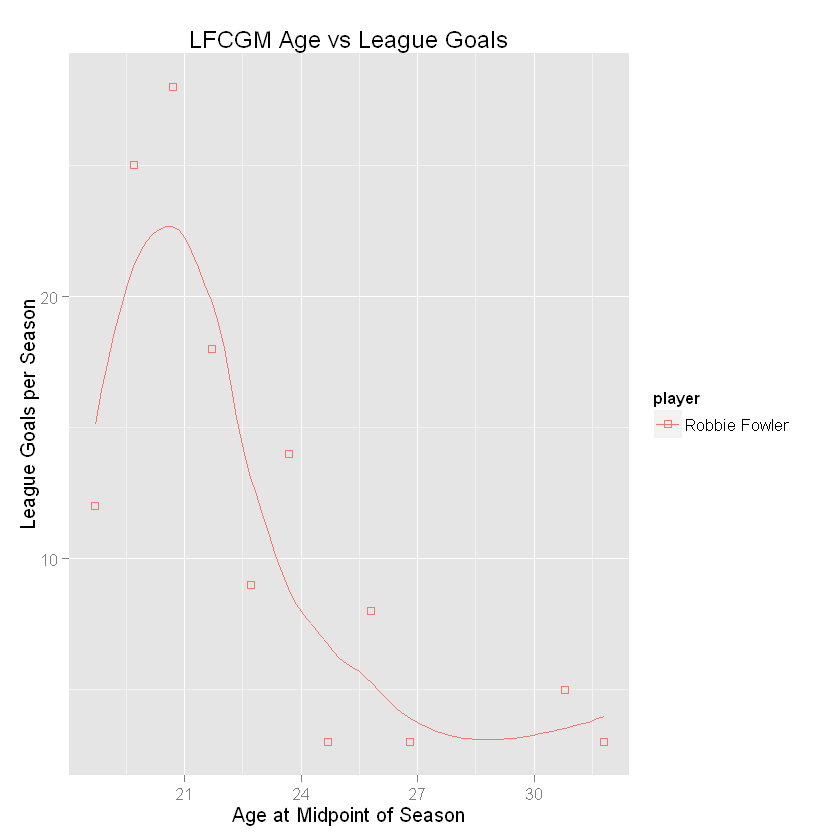

In [24]:
# produce plot for player known as 'god'
players = c('Robbie Fowler')
plt <- ggplot_age_vs_lgoals(dflfcgm, players)
suppressWarnings(print(plt))

,season,player,league,position,age
63,2011-2012,Andy Carroll,4,Striker,23
81,2010-2011,Andy Carroll,2,Striker,22


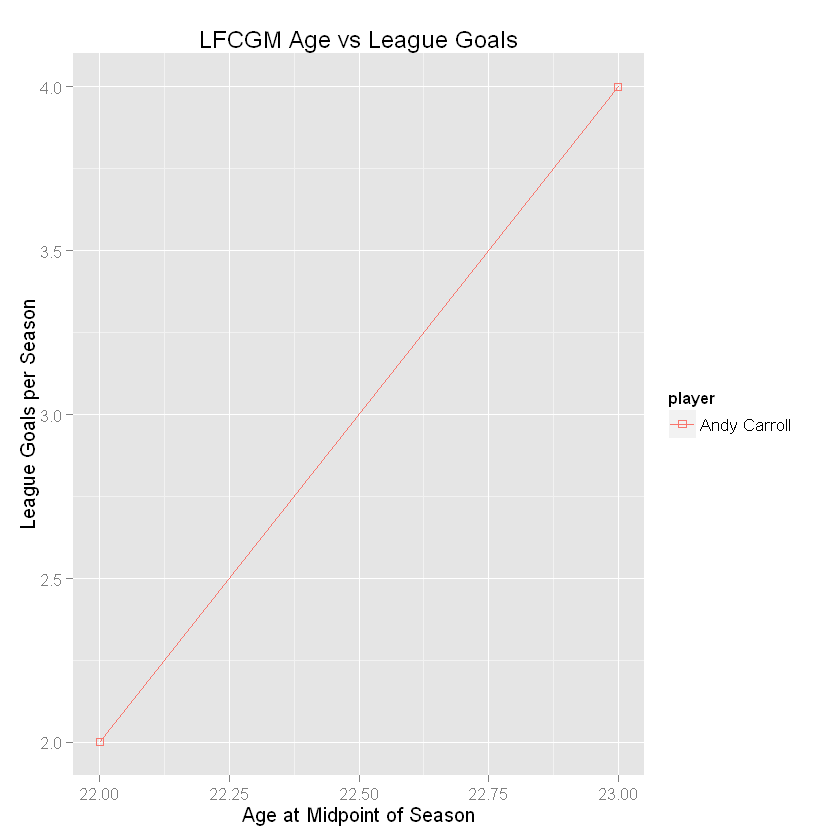

In [25]:
# check plot for a player with only 2 points
dflfcgm[dflfcgm$player == 'Andy Carroll',]

players = c('Andy Carroll')
plt <- ggplot_age_vs_lgoals(dflfcgm, players)
suppressWarnings(print(plt))

,season,player,league,position,age
349,1988-1989,John Aldridge,21,Striker,30.3
755,1946-1947,Jack Balmer,24,Striker,30.9
803,1934-1935,Gordon Hodgson,27,Striker,30.7
911,1925-1926,Dick Forshaw,27,Striker,30.4
1056,1908-1909,Ronald Orr,20,Striker,32.4


[1] John Aldridge  Jack Balmer    Gordon Hodgson Dick Forshaw   Ronald Orr    
380 Levels: Abel Xavier Abraham Hartley Adam Lallana ... Yossi Benayoun

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


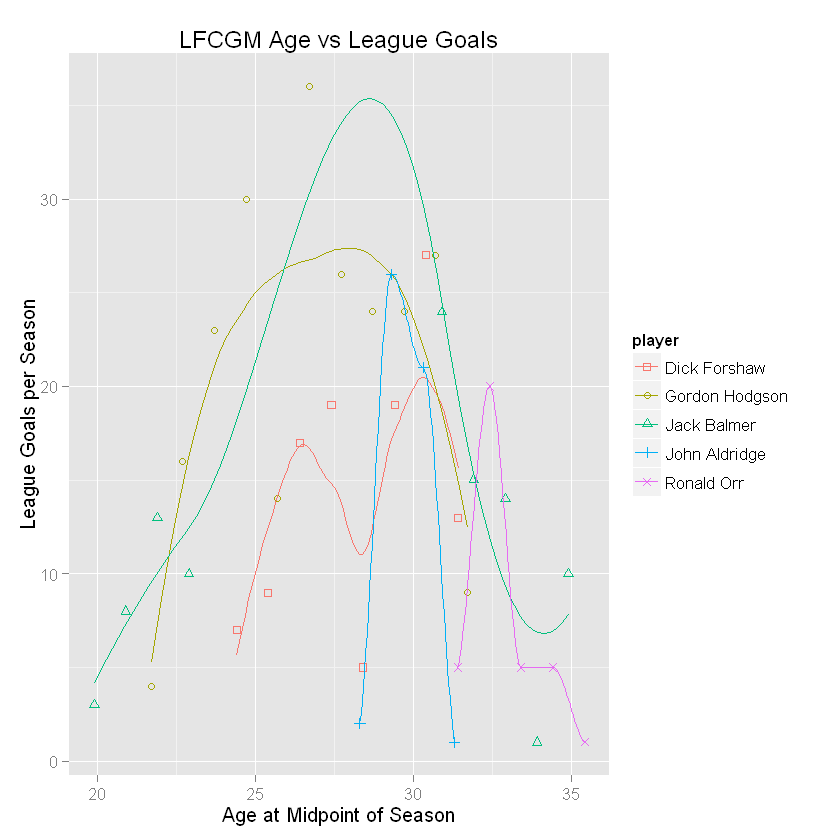

In [26]:
# show all players scoring more than 20 goals when over 30 years old
df_late <- dflfcgm[(dflfcgm$league >= 20) & 
                   (dflfcgm$age > 30),]
df_late
players = df_late$player
players
plt <- ggplot_age_vs_lgoals(dflfcgm, players)
suppressWarnings(print(plt))

geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


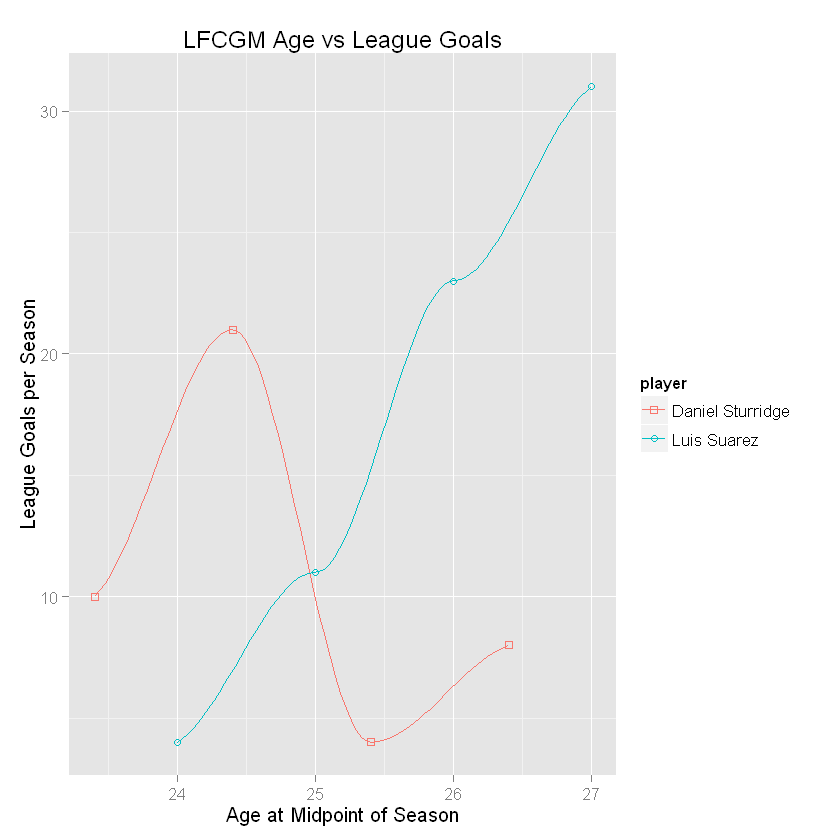

In [27]:
# plot second of TOP_DUO seasons
players = c('Daniel Sturridge', 'Luis Suarez')
plt <- ggplot_age_vs_lgoals(dflfcgm, players)
suppressWarnings(print(plt))

#### Investigate the dropdown list of players (as used in v1.0.0)

and prototype preparing the player input data for UI.R

In [28]:
dim(dflfcgm_dd)

[1] 237   2

In [29]:
str(dflfcgm_dd)

'data.frame':	237 obs. of  2 variables:
 $ label: Factor w/ 237 levels "Adam Lallana",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ value: Factor w/ 237 levels "Adam Lallana",..: 1 2 3 4 5 6 7 8 9 10 ...


In [30]:
head(dflfcgm_dd)

,label,value
1,Adam Lallana,Adam Lallana
2,Alan A'Court,Alan A'Court
3,Alan Hansen,Alan Hansen
4,Alan Kennedy,Alan Kennedy
5,Albert Stubbins,Albert Stubbins
6,Alberto Moreno,Alberto Moreno


In [31]:
tail(dflfcgm_dd)

,label,value
232,Walter Wadsworth,Walter Wadsworth
233,Willie Devlin,Willie Devlin
234,Willie Fagan,Willie Fagan
235,Willie Stevenson,Willie Stevenson
236,Xabi Alonso,Xabi Alonso
237,Yossi Benayoun,Yossi Benayoun


In [32]:
length(dflfcgm_dd$value)

[1] 237

In [33]:
dd_players = dflfcgm_dd$value

In [34]:
dd_players[1:5]

[1] Adam Lallana    Alan A'Court    Alan Hansen     Alan Kennedy   
[5] Albert Stubbins
237 Levels: Adam Lallana Alan A'Court Alan Hansen ... Yossi Benayoun

In [35]:
class(dd_players)

[1] "factor"

In [36]:
# create vector of strings containing the list of players for the input dropdowns
dd_p <- levels(dd_players)[1:5]

In [37]:
class(dd_p)

[1] "character"

In [38]:
dd_p

[1] "Adam Lallana"    "Alan A'Court"    "Alan Hansen"     "Alan Kennedy"   
[5] "Albert Stubbins"

In [39]:
# add default 'empty' value to beginning of the player dropdown list
EMPTY = '<Select Player>'
print(EMPTY)
dd_p = c(EMPTY, dd_p)
print(dd_p)

[1] "<Select Player>"
[1] "<Select Player>" "Adam Lallana"    "Alan A'Court"    "Alan Hansen"    
[5] "Alan Kennedy"    "Albert Stubbins"


In [40]:
# investigate generating the dropdown list using lapply
p <- c()
lapply(1:8, function(i) {
  p <- c(p, paste0('dd', i))
})

[[1]]
[1] "dd1"

[[2]]
[1] "dd2"

[[3]]
[1] "dd3"

[[4]]
[1] "dd4"

[[5]]
[1] "dd5"

[[6]]
[1] "dd6"

[[7]]
[1] "dd7"

[[8]]
[1] "dd8"